<a href="https://colab.research.google.com/github/emilyfriedman8/eda_assignment/blob/main/assignment_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
#1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/airbnb_hw.csv',low_memory=False)

In [ ]:
#2
# Dimensions of the dataset (rows, columns)
print("Dimensions:", df.shape)

# Number of observations (rows)
print("Number of observations:", len(df))

# Variables (column names)
print("Variables:", df.columns.tolist())

df.head()

Dimensions: (30478, 13)
Number of observations: 30478
Variables: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#3

# Cross tabulation of Room Type and Property Type
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

# The most common rentals are apartments and houses. Types of properties where private
# rooms are more common than renting the entire property: Bed & breakfasts, castles, chalets,
#dorms and treehouses.

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

Original Price stats:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
Original Price stats:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


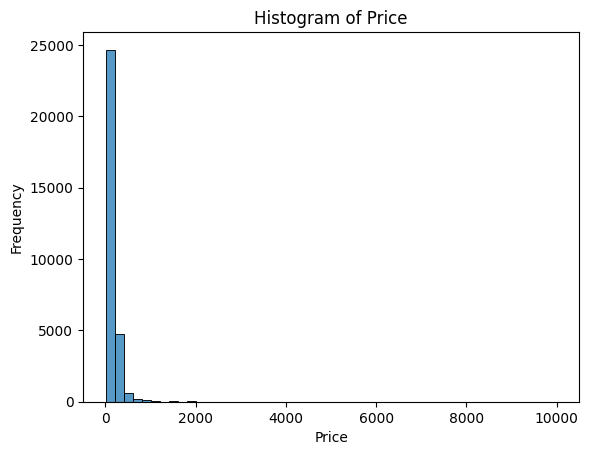

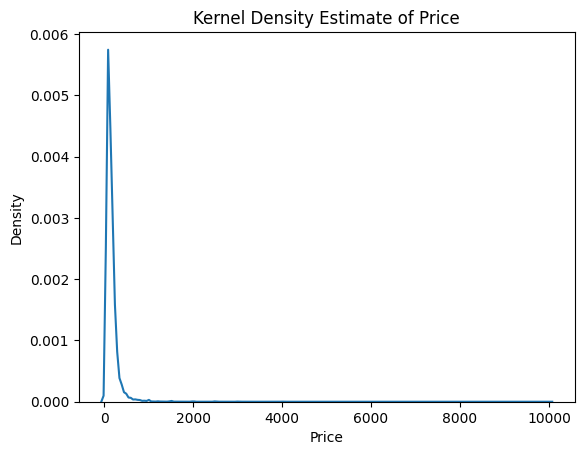

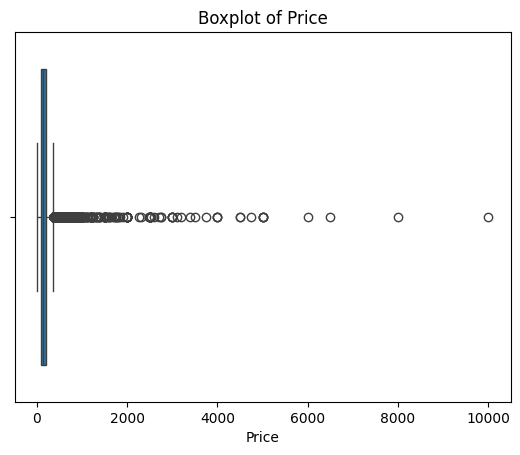


Log-transformed Price stats:
count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


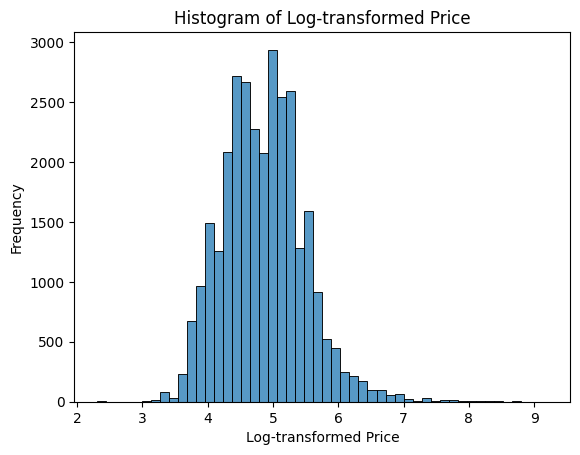

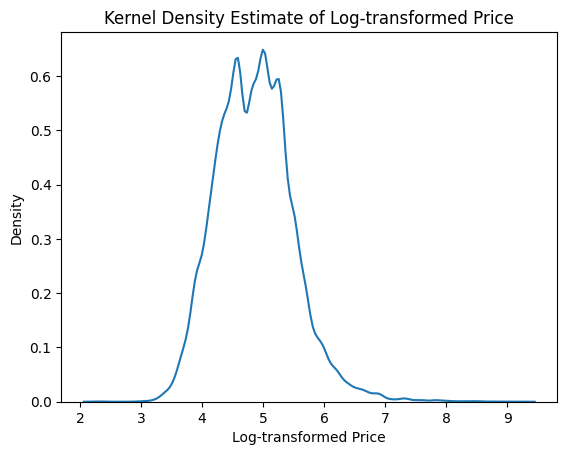

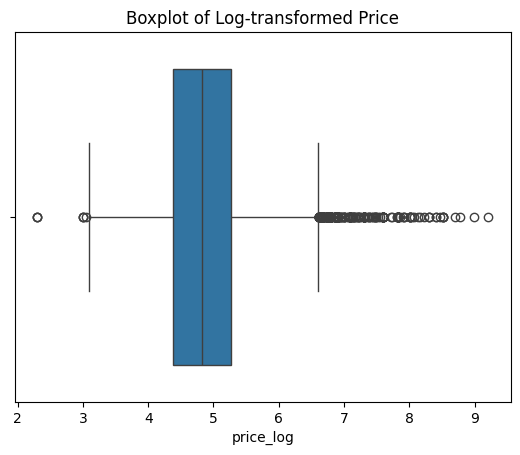

In [ ]:
#4

# Convert 'Price' to numeric
df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN prices for plotting and analysis
df_cleaned = df.dropna(subset=['Price']).copy()

# Descriptive statistics
print("Original Price stats:")
print(df_cleaned['Price'].describe())

# -------------------
# Round 1: Raw Price
# -------------------
print("Original Price stats:")
print(df_cleaned['Price'].describe())

# Histogram (raw price)
sns.histplot(df_cleaned['Price'], bins=50)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Kernel Density (raw price)
sns.kdeplot(data=df_cleaned, x='Price')
plt.title("Kernel Density Estimate of Price")
plt.xlabel("Price")
plt.show()

# Boxplot (raw price)
sns.boxplot(data=df_cleaned, x='Price')
plt.title("Boxplot of Price")
plt.show()

# -------------------
# Round 2: Log-transformed Price
# -------------------

# Create 'price_log' variable
df_cleaned['price_log'] = np.log(df_cleaned['Price'])

print("\nLog-transformed Price stats:")
print(df_cleaned['price_log'].describe())

# Histogram (log-transformed price)
sns.histplot(df_cleaned['price_log'], bins=50)
plt.title("Histogram of Log-transformed Price")
plt.xlabel("Log-transformed Price")
plt.ylabel("Frequency")
plt.show()

# Kernel Density (log-transformed price)
sns.kdeplot(data=df_cleaned, x='price_log')
plt.title("Kernel Density Estimate of Log-transformed Price")
plt.xlabel("Log-transformed Price")
plt.show()

# Boxplot (log-transformed price)
sns.boxplot(data=df_cleaned, x='price_log')
plt.title("Boxplot of Log-transformed Price")
plt.show()

#When using the raw price data, the histogram, kernel density plot, and boxplot all
# showed a heavily right-skewed distribution with many extreme outliers, making the
# data hard to interpret. After applying a log transformation, the distribution
# became more symmetric and evenly spread, reducing the influence of outliers and
# giving a clearer view of the typical range of prices.

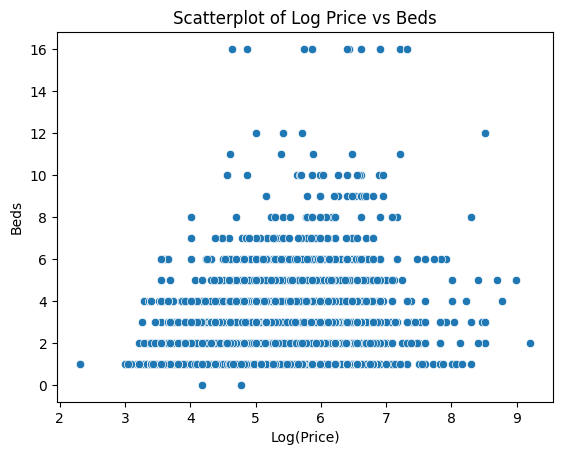

price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0      16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   
11.0       5.0  5.913390  0.996967  4.605170  5.393628  5.883322  6.476972   
12.0       4.0  6.161928  1.595714  5.010635  5.314734  5.559941  6.407135   
16.0      13.0  6.312746  0.877963  4.644391  5.857933  6.437752  6.907755   

                
           max  
Beds            
0.0   4.779123  
1.0   8.294050  
2.0   9.210340  
3.0   8.517193  
4.0   8.779557  
5.0   8.987197  
6.0   7.919356  
7.0   6.802395  
8.0   8.294050  
9.0   6.956545  
10.0  6.956545  
11.0  7.207860  
12.0  8.517193  
16.0  7.313220

In [ ]:
# 5

# Drop rows with NaN prices for plotting and analysis
df_cleaned = df.dropna(subset=['Price']).copy()

# Create 'price_log' variable
df_cleaned['price_log'] = np.log(df_cleaned['Price'])

# Scatterplot: log price vs beds
sns.scatterplot(data=df_cleaned, x='price_log', y='Beds')
plt.title("Scatterplot of Log Price vs Beds")
plt.xlabel("Log(Price)")
plt.ylabel("Beds")
plt.show()

# Variable and group
var = 'price_log'
group = 'Beds'

# Grouped description of log price by Beds
group_stats = df_cleaned.loc[:, [group, var]].groupby(group).describe()
display(group_stats)

#Scatterplot: The scatterplot of log price vs beds shows that while most listings fall
# in the 1–3 bed range, log price increases with bed count. Larger properties (5+ beds)
# tend to be more expensive but also display greater variability.

#Grouped stats: The grouped description confirms that average log price rises with
# bed count, while the standard deviation (for the most part) also grows, reflecting more
#variability among larger homes. Outliers exist across all categories, but especially in the
# low-bed and high-bed groups, where some properties are priced at extreme levels.

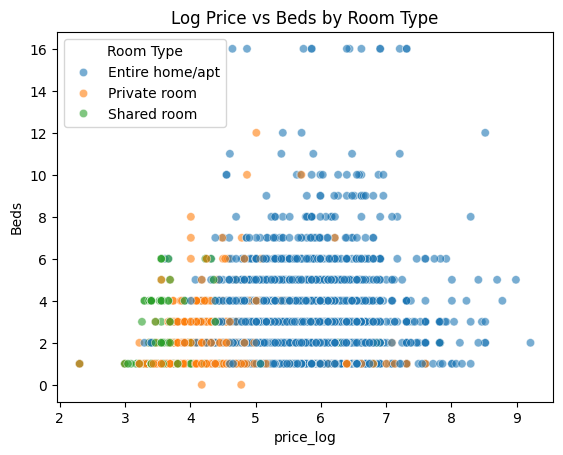

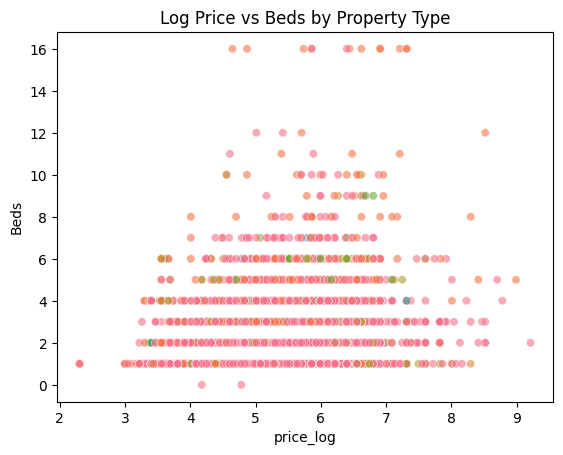

In [ ]:
#6

# Scatterplot of log price vs beds, colored by room type
sns.scatterplot(data=df_cleaned, x="price_log", y="Beds", hue="Room Type", alpha=0.6)
plt.title("Log Price vs Beds by Room Type")
plt.show()

# Scatterplot of log price vs beds, colored by property type
sns.scatterplot(data=df_cleaned, x="price_log", y="Beds", hue="Property Type", alpha=0.6, legend = False)
plt.title("Log Price vs Beds by Property Type")
plt.show()

#Entire homes and apartments tend to be the most expensive, particularly as the number of
#beds increases, while private and shared rooms cluster at much lower price levels.
#Unique properties such as villas, castles, or treehouses appear as isolated high-priced outliers.

#Entire home/apartment villas have he highest average nightly prices, while entire homes
#and apartments have the greatest  standard deviations due to the mix of budget and luxury listings.
#Because the distribution of prices is heavily right-skewed, the median provides
# a more reliable measure of central tendency than the mean.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [7]:
#1
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drilling_rigs.csv',low_memory=False)


print(df.shape)      # number of observations (rows) and variables (columns)
print(df.dtypes)     # data types of each variable
print(df.head())     # preview first few rows

# columns you reported as object but should be numeric
cols_to_numeric = [
    "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
    "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
    "Active Well Service Rig Count (Number of Rigs)"
]

# strip formatting characters and coerce to numbers
df[cols_to_numeric] = (
    df[cols_to_numeric]
      .replace({r",": "", r"\s+": "", r"—|–|NaN|NA|n/a": None}, regex=True)
      .apply(pd.to_numeric, errors="coerce")
)

(623, 10)
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                          

In [4]:
#2

# 1) Convert Month -> datetime (mixed formats allowed) into a new column 'time'
df['time'] = pd.to_datetime(df['Month'], format='mixed')

# 3) Sort by time so the series is ordered
df = df.sort_values('time').reset_index(drop=True)

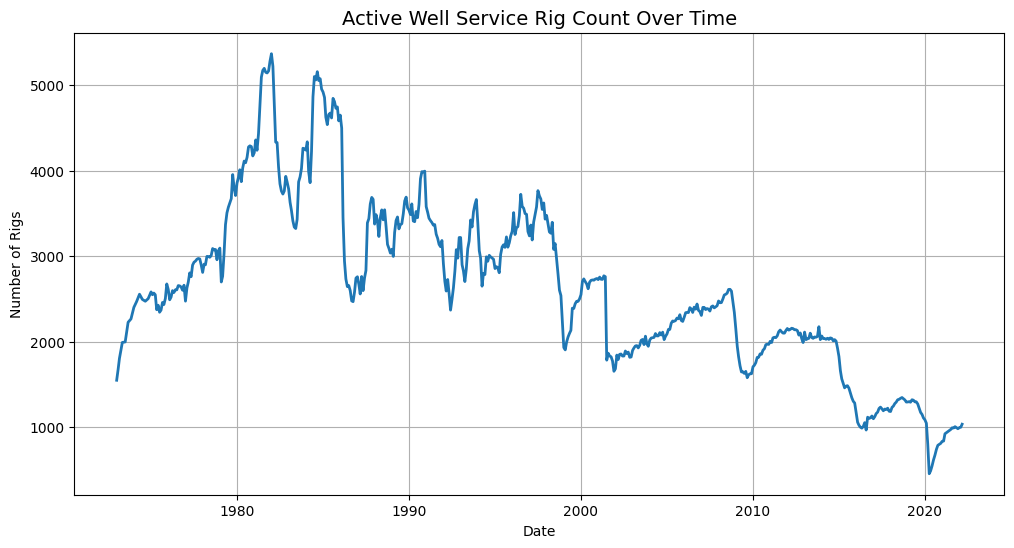

In [5]:
#3
# Convert to numeric
df["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(
    df["Active Well Service Rig Count (Number of Rigs)"], errors="coerce"
)

# Convert Month to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed')

# Ensure numeric
col = "Active Well Service Rig Count (Number of Rigs)"
df[col] = pd.to_numeric(df[col], errors="coerce")

# Sort by time
df = df.sort_values("time")

# Plot
plt.figure(figsize=(12,6))
plt.plot(df["time"], df["Active Well Service Rig Count (Number of Rigs)"], linewidth=2)
plt.title("Active Well Service Rig Count Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Rigs")
plt.grid(True)
plt.show()

#Description: The time series of Active Well Service Rig Count shows a long history
# of cyclical rises and sharp declines, reflecting the variabile nature of the oil industry.
# Over time, the amplitude of cycles has diminished, with lower peaks and slower recoveries.
# The most recent period shows that rig activity has not rebounded to pre-2014 or
# pre-2008 levels, even as oil demand recovered.

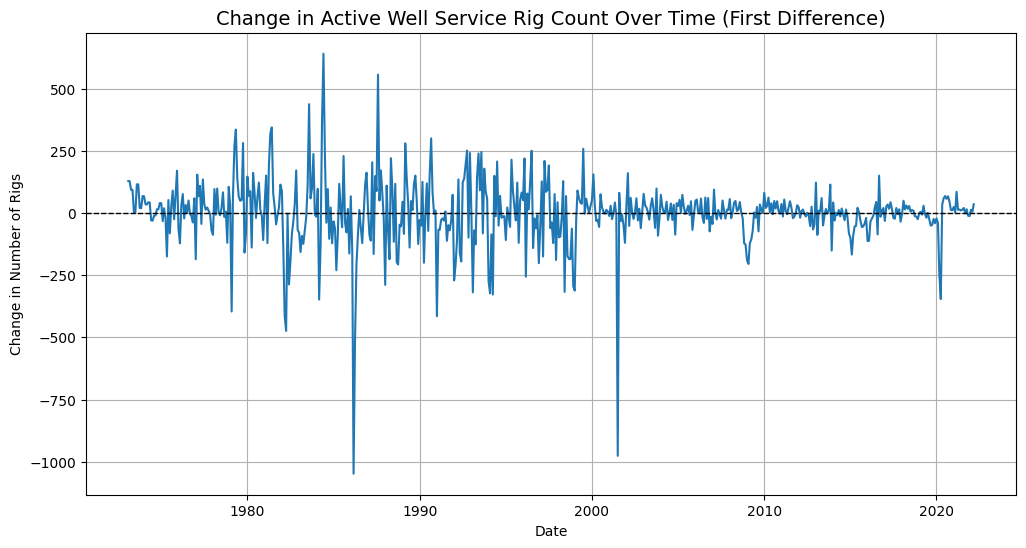

In [6]:
#4

# Compute first difference
df["rig_diff"] = df[col].diff()

# Plot with seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="time", y="rig_diff")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Change in Active Well Service Rig Count Over Time (First Difference)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Change in Number of Rigs")
plt.grid(True)
plt.show()

#Description: The first-difference plot shows that changes in active rigs usually stay
# near zero, with small month-to-month increases or decreases. Big negative spikes dominate,
# marking industry downturns like the mid-1980s crash, the 2008 recession, the 2014–2016 oil
# price collapse, and especially the 2020 COVID shock. Positive jumps are smaller and less
# frequent, reflecting that rigs are cut quickly in crises but added back more slowly.


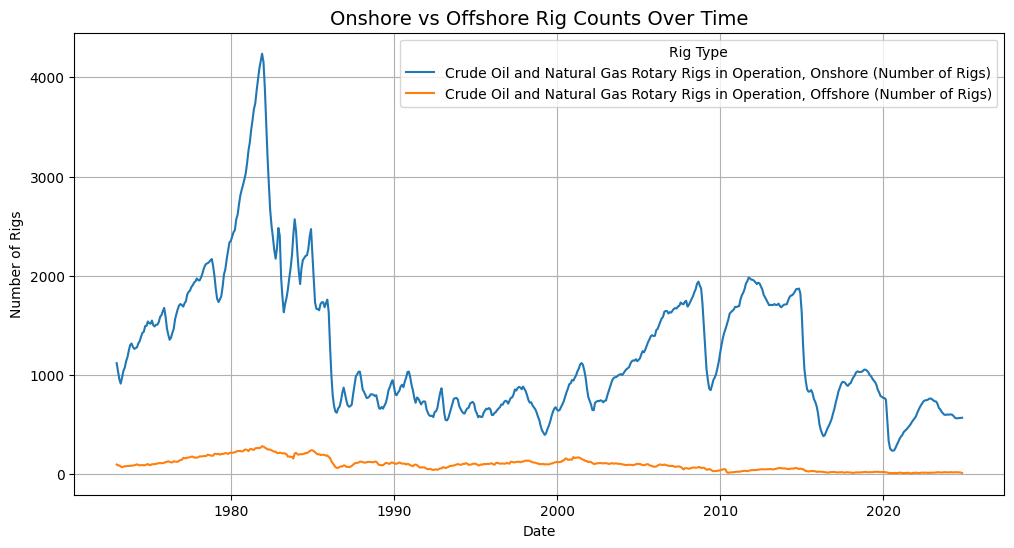

In [9]:
#5

# Convert Month to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed')

# Select only onshore & offshore columns
onoff_cols = [
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"
]

# Melt to long format
df_melted = df.melt(
    id_vars="time",
    value_vars=onoff_cols,
    var_name="Rig_Type",
    value_name="Count"
)

# Ensure numeric
df_melted["Count"] = pd.to_numeric(df_melted["Count"], errors="coerce")

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x="time", y="Count", hue="Rig_Type")
plt.title("Onshore vs Offshore Rig Counts Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Rigs")
plt.legend(title="Rig Type")
plt.grid(True)
plt.show()
